<a href="https://colab.research.google.com/github/princenishad5471/Projects_Resume_Tnp/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/sales_prediction.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

SEED=42

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=SEED)
x_train.shape,x_test.shape

((5966, 11), (2557, 11))

In [ ]:
x_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
y_train.head(3)

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780


In [ ]:
x_train_c=x_train.copy()

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [ ]:
num_data=x_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

,0
Item_Weight,1023
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


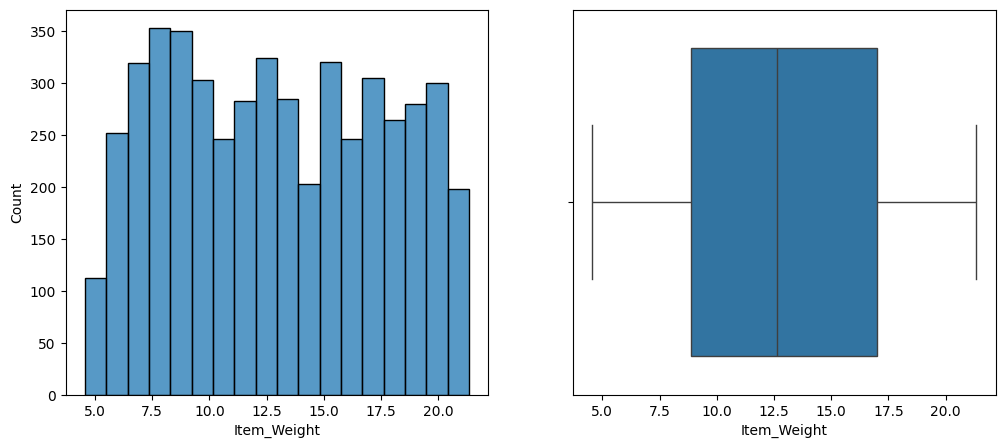

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=x_train_c,x='Item_Weight',ax=ax[0]);
sns.boxplot(data=x_train_c,x='Item_Weight',ax=ax[1]);

In [ ]:
def visualize_numeric_feature(data_frame,col_name):
  fig,ax=plt.subplots(1,2,figsize=(12,5))
  sns.histplot(data=data_frame,x=col_name,ax=ax[0]);
  sns.boxplot(data=data_frame,x=col_name,ax=ax[1]);


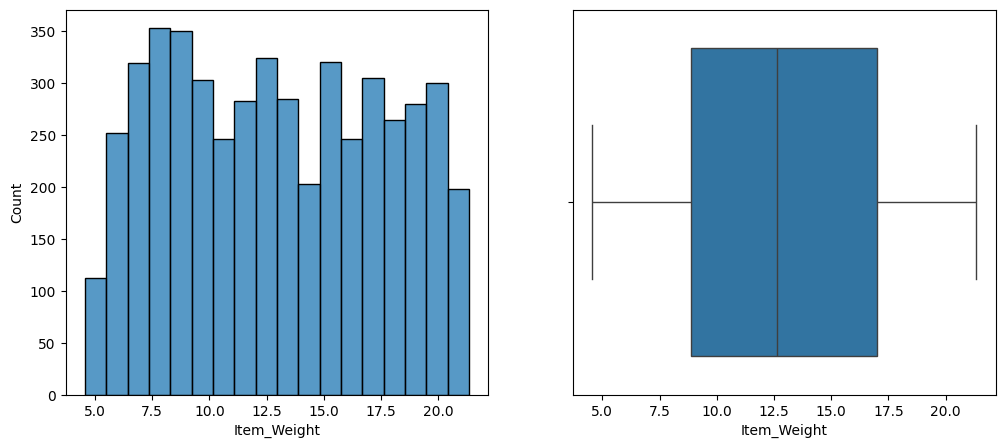

In [ ]:
visualize_numeric_feature(x_train_c,'Item_Weight')

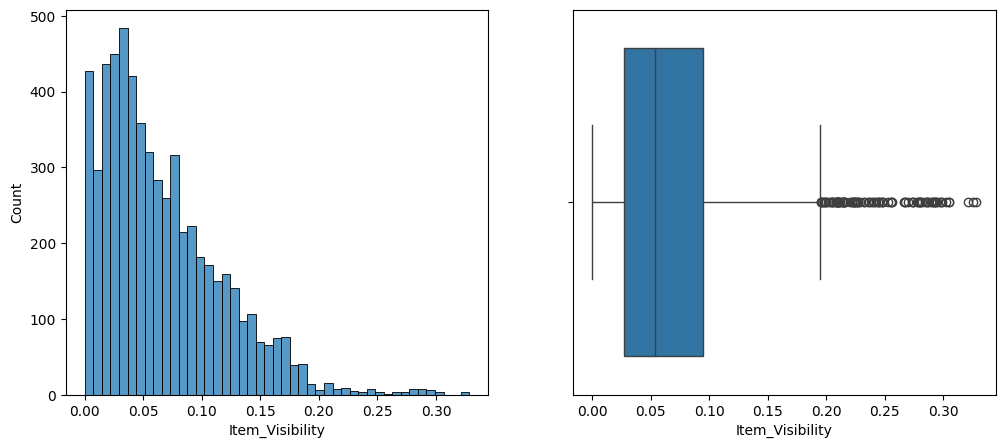

In [ ]:
visualize_numeric_feature(x_train_c,'Item_Visibility')

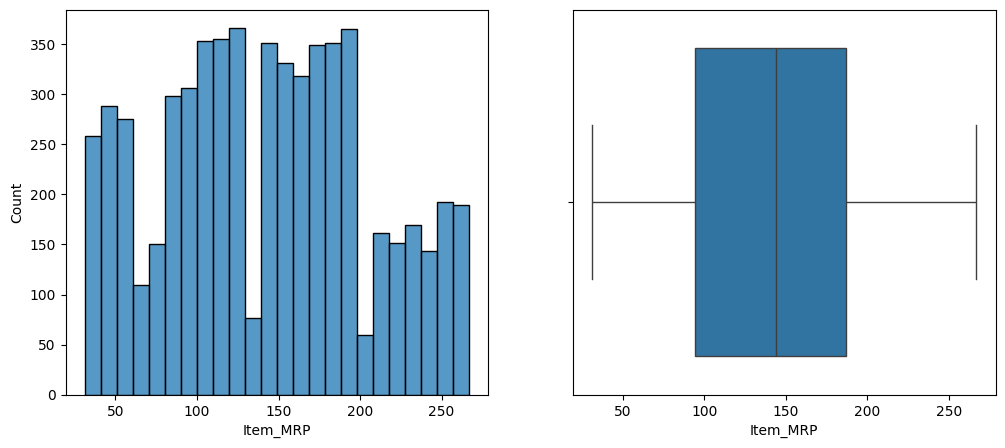

In [ ]:
visualize_numeric_feature(x_train_c,'Item_MRP')

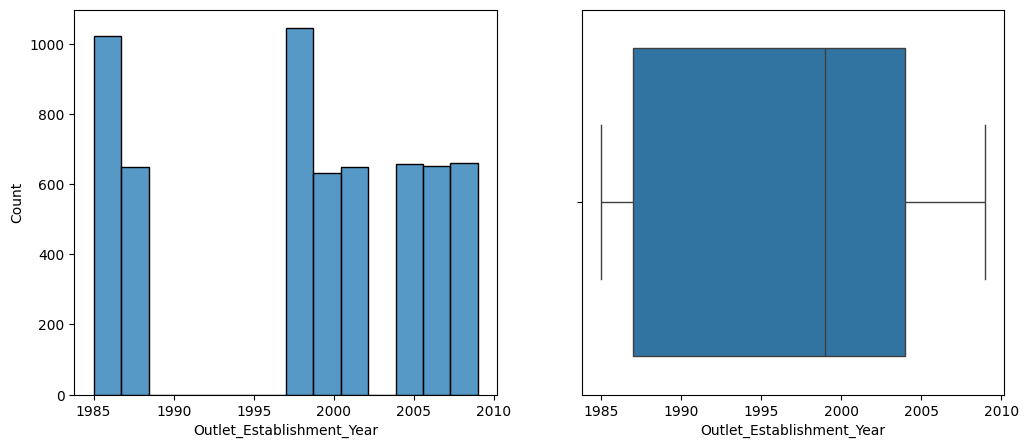

In [ ]:
visualize_numeric_feature(x_train_c,'Outlet_Establishment_Year')

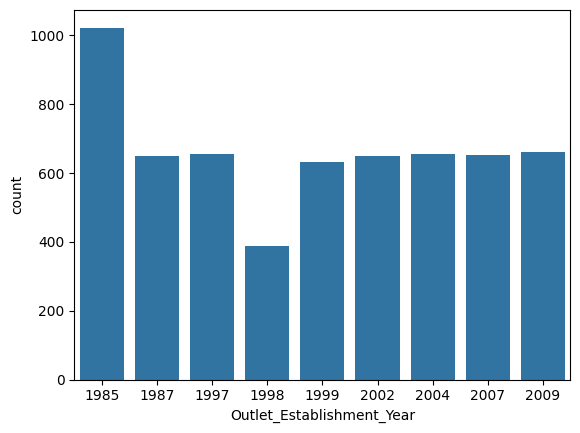

In [ ]:
sns.countplot(data=x_train_c,x='Outlet_Establishment_Year');

In [ ]:
cat_feature=x_train_c.select_dtypes(include=['object'])
cat_feature.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feature.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,FDF52,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_feature.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
cat_feature['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDF52,9
NCI54,9
FDN56,8
DRE49,8
FDV60,8
...,...
FDR16,1
FDY19,1
FDV27,1


In [ ]:
cat_feature['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,905
Snack Foods,835
Household,648
Frozen Foods,591
Dairy,474
Canned,450
Baking Goods,438
Health and Hygiene,365
Soft Drinks,305


In [ ]:
cat_feature['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,668
OUT018,661
OUT035,656
OUT046,656
OUT017,652
OUT013,649
OUT045,649
OUT049,631
OUT010,389


In [ ]:
cat_feature['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,1960
Small,1667
High,649


In [ ]:
cat_feature['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [ ]:
cat_feature['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


In [ ]:
x_train_c['Item_Identifier'].apply(lambda x:x[:2])

,Item_Identifier
1921,FD
655,NC
2229,FD
2537,FD
3528,FD
...,...
5734,FD
5191,FD
5390,NC
860,FD


In [ ]:
x_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [ ]:
x_train_c['Item_Identifier'].apply(lambda x:x[0:2]).value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [ ]:
x_train_c['Item_Identifier'].str[:2].value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [ ]:
def create_item_type(data_frame):
  data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type']=data_frame['Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
  return data_frame

In [ ]:
x_train_c=create_item_type(x_train_c)
x_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [ ]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drinks,5.730
998,Drinks,20.250
670,Drinks,8.395
6091,Drinks,13.500
3438,Drinks,13.850
...,...,...
6624,Non-Consumable,12.600
6191,Non-Consumable,8.880
1911,Non-Consumable,19.850
135,Non-Consumable,7.235


In [ ]:
ITEM_ID_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Type',
                                           aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING=dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))

In [ ]:
def impute_item_weight(data_frame):
  data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))

  data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return data_frame

In [ ]:
x_train_c=impute_item_weight(x_train_c)

In [ ]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [ ]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
def impute_outlet_size(data_frame):
  data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map(OUTLET_SIZE_MAPPING))
  return data_frame

In [ ]:
OUTLET_TYPE_SIZE_PIVOT = x_train_c.pivot_table(values='Outlet_Size',index='Outlet_Type',
                                              aggfunc=(lambda x : x.mode()[0])).reset_index()
OUTLET_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'],OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))



In [ ]:
x_train_c = impute_outlet_size(x_train_c)

In [ ]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
x_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [ ]:
def standardize_item_fat_content(data_frame):
  data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

  return data_frame

In [ ]:
x_train_c = standardize_item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3860
Regular,2106


In [ ]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Low Fat             1137
dtype: int64

In [ ]:
x_train_c.loc[x_train_c['Item_Type']=='Non_Consumables','Item_Fat_Content']

,Item_Fat_Content


In [ ]:
def correct_item_fat_content(data_frame):
  data_frame.loc[data_frame['Item_Type']=='Non_Consumables','Item_Fat_Content']='Non_Edible'
  return data_frame

In [ ]:
x_train_c=correct_item_fat_content(x_train_c)
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low Fat              517
                Regular               43
Food            Low Fat             2206
                Regular             2063
Non-Consumable  Low Fat             1137
dtype: int64

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
# @title Prepare Datasets For ML

In [ ]:
def prepare_dataset(data_frame):

  data_frame=create_item_type(data_frame)
  data_frame=impute_item_weight(data_frame)
  data_frame=impute_outlet_size(data_frame)
  data_frame=standardize_item_fat_content(data_frame)
  return data_frame

In [ ]:
x_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [ ]:
x_train=prepare_dataset(x_train)
x_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
# @title Handling catogrical Data


In [ ]:
# @title Exp 1: ALL Catogirical columns - one hot ended


In [ ]:
cat_feature=x_train.select_dtypes(include=['object'])
cat_feature.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Low Fat,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oho=OneHotEncoder(handle_unknown='ignore')
oho.fit(cat_feature)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
oho_feature_names=oho.get_feature_names_out(input_features=cat_feature.columns)
oho_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
num_feature=x_train.select_dtypes(exclude=['object'])
num_feature.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,8.60,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
cat_feature_train=x_train.select_dtypes(include=['object'])
x_train_cat_oho=pd.DataFrame(oho.transform(cat_feature_train).toarray(),columns=oho_feature_names, index=cat_feature_train.index)
x_train_cat_oho.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
x_train_final=pd.concat([num_feature,x_train_cat_oho],axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
final_colums=x_train_final.columns
final_colums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier_DRA12',
       'Item_Identifier_DRA24', 'Item_Identifier_DRA59',
       'Item_Identifier_DRB01', 'Item_Identifier_DRB13',
       'Item_Identifier_DRB24',
       ...
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object', length=1572)

In [ ]:
x_test = prepare_dataset(x_test)
num_feature_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feature_test=x_test.select_dtypes(include=['object'])
x_test_cat_oho=pd.DataFrame(oho.transform(cat_feature_test).toarray(),columns=oho_feature_names)
final_colums=x_train_final.columns # Ensuring final_colums is defined
x_test_final=pd.concat([num_feature_test,x_test_cat_oho],axis=1)
x_test_final=x_test_final[final_colums]
x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


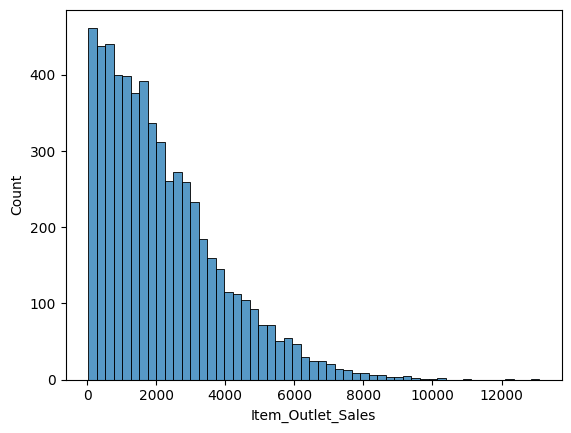

In [ ]:
sns.histplot(y_train);

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np



In [ ]:
from sklearn.metrics import r2_score
def train_and_evaluate_model(model,x_train,y_train,cv=5):
  cv_results=cross_validate(model,x_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'),)
  print('Model:',model)

  r2_scores=cv_results['test_r2']
  print('R2 CV scores:',r2_scores)
  print('R2 CV scores mean / stdev:',np.mean(r2_scores),np.std(r2_scores))


  rmse_scores=-cv_results['test_neg_root_mean_squared_error']
  rmse_scores=[-1*score for score in rmse_scores]
  print('RMSE CV scores:',rmse_scores)
  print('RMSE CV scores mean / stdev:',np.mean(rmse_scores),np.std(rmse_scores))
#

In [ ]:
rf_model=RandomForestRegressor(random_state=SEED)
train_and_evaluate_model(model=rf_model,x_train=x_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57158741 0.52725868 0.54237015 0.55238222 0.51622458]
R2 CV scores mean / stdev: 0.5419646044554114 0.019313285573342425
RMSE CV scores: [np.float64(-1102.80635643842), np.float64(-1167.9245984584165), np.float64(-1181.1734851314827), np.float64(-1156.8080206227978), np.float64(-1207.0247905221004)]
RMSE CV scores mean / stdev: -1163.1474502346434 34.50859614149334


In [ ]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_evaluate_model(model=gb,x_train=x_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60617966 0.59187516 0.57328493 0.60740308 0.54964161]
R2 CV scores mean / stdev: 0.5856768872321926 0.02183076748206495
RMSE CV scores: [np.float64(-1057.3462193020523), np.float64(-1085.1743933109324), np.float64(-1140.579358607534), np.float64(-1083.3806323883641), np.float64(-1164.5909726377847)]
RMSE CV scores mean / stdev: -1106.2143152493336 39.8520677569976


In [ ]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_evaluate_model(model=hgb,x_train=x_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58388983 0.54033287 0.54755752 0.58223783 0.54716116]
R2 CV scores mean / stdev: 0.560235840722721 0.018822404148431414
RMSE CV scores: [np.float64(-1086.8567589000188), np.float64(-1151.6612301389123), np.float64(-1174.459929973874), np.float64(-1117.5634249975221), np.float64(-1167.7936944145083)]
RMSE CV scores mean / stdev: -1139.667007684967 32.9332964168704


In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_evaluate_model(model=xgr,x_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores: [0.51606404 0.48809987 0.45138986 0.51438879 0.45340821]
R2 CV scores mean / stdev: 0.4846701527304768 0.028161761694690125
RMSE CV scores: [np.float64(-1172.093055145207), np.float64(-1215.3339792788327), np.float64(-1293.267703

In [ ]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_evaluate_model(model=lgbr,x_train=x_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 29
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 29
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

**Handling Catogrical Data**
Exp:1 ALL Catogrical Data- Native Handling **bold text**

In [ ]:
x_train_copy=x_train.copy().drop(columns='Item_Identifier')
cat_cols=x_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols=x_train_copy.select_dtypes(exclude=['object']).columns.tolist()
cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [ ]:
x_train_copy[cat_cols]=x_train_copy[cat_cols].astype('category')
n_catogrical_features=len(cat_cols)
n_numerical_features=len(num_cols)
x_train_copy = x_train_copy.astype( (dict(zip(cat_cols, ['category']*len(cat_cols))) | dict(zip(num_cols, ['float64']*len(num_cols)))) )
x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                5966 non-null   float64 
 1   Item_Fat_Content           5966 non-null   category
 2   Item_Visibility            5966 non-null   float64 
 3   Item_Type                  5966 non-null   category
 4   Item_MRP                   5966 non-null   float64 
 5   Outlet_Identifier          5966 non-null   category
 6   Outlet_Establishment_Year  5966 non-null   float64 
 7   Outlet_Size                5966 non-null   category
 8   Outlet_Location_Type       5966 non-null   category
 9   Outlet_Type                5966 non-null   category
dtypes: category(6), float64(4)
memory usage: 269.1 KB


In [ ]:
catogrical_mask=[True]*n_catogrical_features+[False]*n_numerical_features
catogrical_mask

[True, True, True, True, True, True, False, False, False, False]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector

catogrical_mask=[True]*n_catogrical_features+[False]*n_numerical_features
ordinal_encoder=make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),make_column_selector(dtype_include='category')),remainder='passthrough',)
hgb=make_pipeline(ordinal_encoder,HistGradientBoostingRegressor(random_state=42,categorical_features=catogrical_mask),)
train_and_evaluate_model(model=hgb,x_train=x_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f92543c60f0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [ ]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_evaluate_model(model=lgbr,x_train=x_train_final,y_train=y_train)

**Handling Catogrical Data**
Exp:3 No item identifier-One hot encoded **bold text**

In [ ]:
x_train.select_dtypes(include=['object']).head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Low Fat,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_feature=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
oho=OneHotEncoder(handle_unknown='ignore')
oho.fit(cat_feature)
oho_feature_names=oho.get_feature_names_out(input_features=cat_feature.columns)

In [ ]:
num_feature_train=x_train.select_dtypes(exclude=['object'])
oho=OneHotEncoder(handle_unknown='ignore')
oho.fit(cat_feature)

oho_feature_names=oho.get_feature_names_out(input_features=cat_feature.columns)

In [ ]:
num_feats_train = num_feature_train
cat_feats_train = cat_feature
X_train_cat_ohe = pd.DataFrame(oho.transform(cat_feats_train).toarray(), columns=oho_feature_names, index=cat_feats_train.index)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumable,Outlet_Identifier_OUT010,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,7.72,0.147904,116.6466,1998,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,19.75,0.014301,103.0332,1997,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,8.60,0.054221,129.1310,1985,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,18.35,0.092150,184.8266,1987,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_evaluate_model(model=gb, x_train=x_train_final, y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60617966 0.59187516 0.57328493 0.60740308 0.54964161]
R2 CV scores mean / stdev: 0.5856768872321926 0.02183076748206495
RMSE CV scores: [np.float64(-1057.3462193020523), np.float64(-1085.1743933109324), np.float64(-1140.579358607534), np.float64(-1083.3806323883641), np.float64(-1164.5909726377847)]
RMSE CV scores mean / stdev: -1106.2143152493336 39.8520677569976


In [ ]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_evaluate_model(model=hgb, x_train=x_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58388983 0.54033287 0.54755752 0.58223783 0.54716116]
R2 CV scores mean / stdev: 0.560235840722721 0.018822404148431414
RMSE CV scores: [np.float64(-1086.8567589000188), np.float64(-1151.6612301389123), np.float64(-1174.459929973874), np.float64(-1117.5634249975221), np.float64(-1167.7936944145083)]
RMSE CV scores mean / stdev: -1139.667007684967 32.9332964168704


In [ ]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_evaluate_model(model=xgr, x_train=x_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores: [0.5722618  0.56124852 0.54216909 0.58442259 0.52471549]
R2 CV scores mean / stdev: 0.5569634948570625 0.021284782110308577
RMSE CV scores: [np.float64(-1101.938022179983), np.float64(-1125.1549127000342), np.float64(-1181.432929

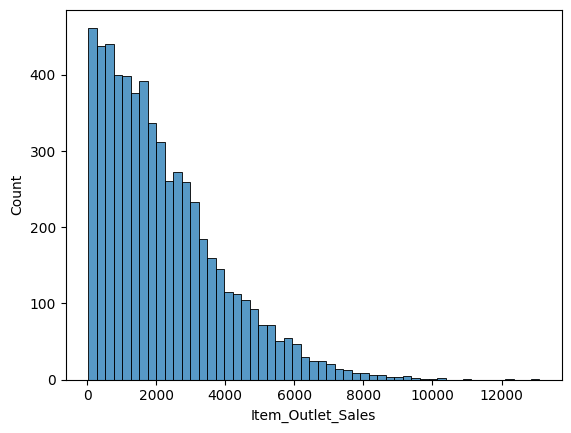

In [ ]:
sns.histplot(y_train);